# L2 Error using numerical integration

### Arnold D. Kim
*Department of Applied Mathematics, University of California, Merced*

#### Nicholas St. Clair
*Department of Physics, Kleckner Lab, University of California, Merced*

In [1]:
import  time
print( 'Last updated: %s' %time.strftime('%d/%m/%Y') )

Last updated: 30/07/2020


In [2]:
# defaults for the codes below

import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

## 1 Problem description

We compute the solution of the scattering problem for the scalar potential, $\phi_{1}$:
\begin{gather*}
   \varDelta \phi_{1} + k^{2} \phi_{1} = 0, \quad \text{in $r > a$},\\
   \partial_{r} \phi_{1} = 0 \quad \text{on $r = a$}.
\end{gather*}
The incident field is given by counter-propagating plane waves,
\begin{equation}
   \phi_{1}^{\text{inc}} = e^{\mathrm{i} k z} + e^{-\mathrm{i} k ( z + \delta )},
\end{equation}
with $\delta$ denoting a parameter that sets the location of the nodes of the standing wave. This parameter is used instead of moving the sphere so that the coordinate system can be fixed at the sphere's center.

We solve this scattering problem using two methods. The first uses the analytical representation as an expansion in Legendre polynomials. The second method uses the method of fundamental solutions (MFS).

In previous work, this scattering problem has been analytically solved for small particles $(ka << 1)$ by approximating the scattered field as a sum of monopole and dipole terms (see Eq. (17) of H. Bruus, "Acoustofluidics 7: The acoustic radiation force on small particles," Lab Chip **12**, 1014 -- 1021 (2012))
\begin{equation}
   \phi_{sc}(r,\theta) = \phi_{mp}(r) + \phi_{dp}(r,\theta), \quad \text{for $r << \lambda$}
\end{equation}
With these terms given by:
\begin{equation}
   \phi_{mp}(r) = - (1 - \frac{\kappa_{p}}{\kappa_{0}}) \frac{a^{3}}{3\rho_{0}} \partial_{t}\rho_{in} \frac{1}{r}
\end{equation}

\begin{equation}
   \phi_{dp}(r,\theta) = \frac{2(\rho_{p} - \rho_{0})}{2\rho_{p} + \rho_{0}} \frac{a^{3}}{2} v_{in} \frac{\cos(\theta)}{r^{2}}
\end{equation}
where  $\rho_{in}$ and $v_{in}$ correspond to the incident pressure and velocity fields, subscripts $p$ and $0$ denote acoustic parameters of the particles and fluid medium respectively, and $\kappa$ is the familiar compressibility factor $\frac{1}{\rho c^{2}}$.

In what follows we compare the $L^{2}$ norm of the difference between the scalar potentials from the Legendre polynomial expansion method and the monopole + dipole approximation for small particles, with the aim of demonstrating a necessity for the inclusion of higher order terms as the particle size becomes appreciable to the wavelength $(ka \approx 1)$.

## 2 Harmonic expansion for the scattered scalar potential

Here we compute the solution of the scattering problem as a harmonic expansion. This solution method is explained below.

### 2.1 Harmonic expansion for counter-propagating plane waves

We consider the following harmonic expansion for a plane wave (see Jackson (10.45)),
\begin{align}
   e^{\mathrm{i} k z} &= \sum_{n = 0}^{\infty} (\mathrm{i})^{n} \sqrt{4 \pi (2 n + 1)} j_{n}(k r) 
   Y_{n0}(\theta,\varphi) \\
   &= \sum_{n = 0}^{\infty} e^{\mathrm{i} n \pi/2} ( 2 n + 1 ) j_{n}(k r) 
   P_{n}(\cos\theta).
\end{align}
It follows that counter-propagating plane waves has the following harmonic expansion,
\begin{equation}
   e^{\mathrm{i} k z} + e^{-\mathrm{i} k ( z + \delta )} = 
   \sum_{n = 0}^{\infty} \left( e^{\mathrm{i} n \pi/2} + e^{-\mathrm{i} n \pi/2} e^{-\mathrm{i} k \delta} \right) 
   ( 2 n + 1 ) j_{n}(k r) P_{n}(\cos\theta).
\end{equation}
Using this expansion, we find that
\begin{equation}
   \partial_{r} \left( e^{\mathrm{i} k z} + e^{-\mathrm{i} k ( z + \delta )} \right) = 
   \sum_{n = 0}^{\infty} \left( e^{\mathrm{i} n \pi/2} + e^{-\mathrm{i} n \pi/2} e^{-\mathrm{i} k \delta} \right) 
   ( 2 n + 1 ) \partial_{r} j_{n}(k r) P_{n}(\cos\theta).
\end{equation}
Let
\begin{equation}
   B_{n} = \left( e^{\mathrm{i} n \pi/2} + e^{-\mathrm{i} n \pi/2} e^{-\mathrm{i} k \delta} \right) 
   ( 2 n + 1 ).
\end{equation}
This expansion is to be used as the normal derivative of the incident field on a sound-hard sphere.

The function below computes these expansion coefficients.

In [3]:
def ComputeIncidentHarmonicExpansionCoeffs( k, a, δ, N ):
    """
    This function computes the expansion coefficients for the field 
    scattered by a sound-hard sphere due to counter-propagating plane
    waves incident on it.
    """
    # compute an array of indices from n = 0 to n = N
    
    n = np.arange( N )
    
    # compute the expansion coefficients

    B_n = ( np.exp( 1j * n * np.pi / 2.0 ) + np.exp( -1j * n * np.pi / 2.0 ) * np.exp( -1j * k * δ ) ) \
        * ( 2 * n + 1 ) 
    
    return B_n;

### 2.2 Harmonic expansion for the scattered field

We write the field scattered by a sphere as the harmonic expansion,
\begin{equation}
   \phi^{s} = \sum_{n = 0}^{\infty} \sum_{m = -n}^{n} c_{nm} h_{n}^{(1)}(k r) Y_{nm}(\theta,\varphi).
\end{equation}
For the counter-propagating plane waves defined above, the scattered field will be rotationally symmetric about the $z$-axis and therefore this harmonic expansion for the scattered field reduces to
\begin{equation}
   \phi^{s} = \sum_{n = 0}^{\infty} \sqrt{\frac{2n+1}{4\pi}} C_{n} h_{n}^{(1)}(k r) P_{n}(\cos\theta).
\end{equation}
It follows that
\begin{equation}
   \partial_{r} \phi^{s} = \sum_{n = 0}^{\infty} \sqrt{\frac{2n+1}{4\pi}} C_{n} \partial_{r} 
   h_{n}^{(1)}(k r) P_{n}(\cos\theta).
\end{equation}
For a sound-hard sphere, $\partial_{r} ( \phi^{\text{inc}} + \phi^{s} ) = 0$ on $r = a$. Thus, we find that
\begin{equation}
   C_{n} = -\sqrt{\frac{4\pi}{2n+1}} \frac{\partial_{r} j_{n}(k a)}{\partial_{r} h_{n}^{(1)}(k a)} B_{n}.    
\end{equation}
The function below computes these expansion coefficients.

In [4]:
def ComputeScatteredHarmonicExpansionCoeffs( k, a, δ, N ):
    """
    This function computes the expansion coefficients for the field 
    scattered by a sound-hard sphere due to counter-propagating plane
    waves incident on it.
    """
    # compute the expansion coefficients for the incident field
    
    B_n = ComputeIncidentHarmonicExpansionCoeffs( k, a, δ, N )
    
    # compute an array of indices from n = 0 to n = N
    
    n = np.arange( N )
    
    # compute the derivative of the spherical Bessel function
    
    Djn = k * sp.spherical_jn( n, k * a, derivative = True )
    
    # compute the derivative of the spherical Hankel function
    
    Dh1n = k * sp.spherical_jn( n, k * a, derivative = True ) \
        + k * 1j * sp.spherical_yn( n, k * a, derivative = True )
    
    # compute the expansion coefficients

    C_n = -np.sqrt( 4.0 * np.pi / ( 2 * n + 1 ) ) * Djn / Dh1n * B_n
    
    return C_n;

### 2.3 Compute Legendre polynomials

The code below computes a matrix whose $n$th column is the evaluation of the Legendre polynomial of degree $n$ on the grid points given by the vector $\mu$.

In [5]:
def ComputeLegendrePolynomials( μ, N ):
    """ 
    This function computes the Gauss-Legendre quadrature rule of order N and evaluates 
    the Legendre polynomials at the Gauss-Legendre quadrature points up to degree N-1.
    
    This function returns the Gauss-Legendre quadrature points mu, quadrature weights wt,
    and a matrix whose columns are the Legendre polynomials evaluated on mu.
    """
    
    # allocate memory for the matrix of Legendre polynomials

    Pn = np.full( ( μ.size, N ), 'nan', dtype = 'complex' )
    
    # compute the Legendre polynomial of degree 0
    
    Pn[:,0] = 1
    
    # compute the Legendre polynomial of degree 1
    
    Pn[:,1] = μ

    # compute the remaining Legendre polynomials using the recursion relation
    
    for n in range( 1, N - 1 ):
    
        Pn[:,n+1] = ( ( 2 * n + 1 ) * μ * Pn[:,n] - n * Pn[:,n-1] ) / ( n + 1 )
        
    return Pn;

### 2.4 Compute the derivatives of the Legendre polynomials

The code below computes the matrix whose $n$th column is the evaluation of the derivative of the Legendre polynomial of degree $n$ on the grid points given by the vector $\mu$.

In [6]:
def ComputeLegendrePolynomialDerivatives( μ, N ):
    """ 
    This function computes the derivatives of the Legendre polynomials.
    """
    
    # allocate memory for the matrix of Legendre polynomials

    DPn = np.full( ( μ.size, N ), 'nan', dtype = 'complex' )
    
    # compute the derivatives of the Legendre polynomials
    
    DPn[:,0] = 0;
    DPn[:,1] = 1;
    
    # compute the current Legendre polynomial of degree n = 2
    
    P_nminus1 = μ
    P_n = 1.5 * μ ** 2 - 0.5
    
    for n in range( 2, N ):
        
        # compute the Legendre polynomial of degree n+1
        
        P_nplus1 = ( ( 2 * n + 1 ) * μ * P_n - n * P_nminus1 ) / ( n + 1 )
        
        # compute the derivative of the Legendre polynomial
        
        DPn[:,n] = ( n + 1 ) / ( μ ** 2 - 1.0 ) * ( P_nplus1 - μ * P_n )
        
        # update the Legendre polynomials
        
        P_nminus1 = P_n
        P_n       = P_nplus1
        
    return DPn;

## 3 The Method of Fundamental Solutions (MFS)

Here, we compute the solution of the scattering problem using the Method of Fundamental Solutions (MFS).

### 3.1 Compute the MFS points

We compute the Fibonnaci lattice (see A. Gonzalez, "Measurement of areas using Fibonnaci and latitude-longitude lattices," Math. Geosci. **42**, 49 (2010)) and use the resulting points on the sphere for the MFS.

In [7]:
def ComputeMFSReferencePoints( a, N, ℓ ):
    """
    This function computes the set of points for a reference sphere that is to be used in the method of 
    fundamental solutions (MFS).
    
    In particular, given the radius of a sphere, a, and the number of points N, this function computes 
    randomly distributed points on the unit sphere and stores them as the unit normal vectors ν. Using 
    ν, we then compute ρ_bdy = a * ν, and ρ_src = ( a - ℓ ) * ν.
    
    This function outputs three vectors: ν, ρ_bdy, and ρ_src.
    """
    # allocate memory for the Fibonacci lattice points on the unit sphere

    ν = np.full( ( N, 3 ), float( 'nan' ) )

    # compute the "golden angle"

    golden_angle = np.pi * ( 3.0 - np.sqrt( 5.0 ) )

    # compute the points on the unit sphere

    ν[:,2] = ( 1 - 1 / N ) * ( 1 - 2 * np.arange( 0, N ) / ( N - 1 ) )

    ρ = np.sqrt( 1.0 - ν[:,2] ** 2 )
    θ = golden_angle * np.arange( 0, N )

    ν[:,0] = ρ * np.cos( θ )
    ν[:,1] = ρ * np.sin( θ )

    # compute the boundary points, interior points, and exterior points

    #ℓ = 0.4 * a

    ρ_bdy = a * ν
    ρ_src = ( a - ℓ ) * ν
    
    return ν, ρ_bdy, ρ_src;

### 3.2 Compute the fundamental solution and its normal derivative

The functions below compute Green's function in a medium with wavenumber $k$ and its normal derivative.

In [8]:
# function to compute Green's function

def ComputeG( k, R ):
    """
    This function computes the whole space Green's function given a wavenumber k and a distance R.
    
    The output of this function is the evaluation of the whole space Green's function.
    """
    
    # compute Green's function
    
    G = np.exp( 1j * k * R ) / ( 4 * np.pi * R )
      
    return G;

# function to compute the normal derivative of Green's function

def ComputeDνG( k, R, CosΘ ):
    """
    This function computes the normal derivative of the whole space Green's function 
    given a wavenumber k and distance R, and the cosine of the angle made between the 
    difference vector and the unit normal.
    
    The output of this function is the evaluation of the normal derivative of the whole 
    space Green's function.
    """
    
    # compute Green's function
    
    G = ComputeG( k, R )
    
    # compute the normal derivative of Green's function
    
    DνG = CosΘ * ( 1j * k - 1 / R ) * G
    
    return DνG;

### 3.3 Compute the MFS expansion coefficients

The function below constructs and solves the linear system for the MFS expansion coefficients. This linear system results from requiring that the sound-hard boundary condition on the sphere is satisfied exactly on the Fibonnaci lattice points.

In [9]:
def ComputeMFSExpansionCoefficients( k, δ, ν, ρ_bdy, ρ_sca, N ):
    """
    This function solves the linear system of equations for the MFS expansion coefficients.
    
    This code requires a wavenumber k, the results from ComputeMFSPoints, namely ν, ρ_bdy, 
    and ρ_ext in addition to the number of MFS points, N, and the number of scattering 
    objects, Nobjs.
    
    The output from this code are the N x Nobs matrix, c, corresponding to the MFS expansion
    coefficients for the scattered field.
    """
    
    # compute a mesh grid of indices to compute the matrices below

    indx, jndx = np.mgrid[ 0 : N , 0 : N ]

    # allocate memory for the linear system
    
    b = np.full( ( N, 1 ), 'nan', dtype = 'complex' )
    A = np.full( ( N, N ), 'nan', dtype = 'complex' )
            
    # compute the incident field (normal derivative of two, counter-propagating plane waves)

    b = -1j * k * ν[:,2] * ( np.exp( 1j * k * ρ_bdy[:,2] ) - np.exp( - 1j * k * ( ρ_bdy[:,2] + δ ) ) )
    
    # compute the distance from scatter points on object q to boundary points on object p

    R = np.sqrt( ( ( ρ_bdy[indx,:] - ρ_sca[jndx,:] ) ** 2 ).sum( axis = 2 ) )

    # compute the cosine of the angle made between the normal on object p and R

    CosΘ = ( ν[indx,:] * ( ρ_bdy[indx,:] - ρ_sca[jndx,:] ) ).sum( axis = 2 ) / R

    # compute the matrix sub-block

    A = ComputeDνG( k, R, CosΘ )
    
    # solve the linear system
    
    c = np.linalg.solve( A, b )
        
    return c;

## 3.3 Compute the MFS scattered scalar potential

The function below computes $\phi_{sc}$ on the sphere according to the method of fundamental solutions.

In [10]:
def ComputeMFSphi( k, a, δ, ρ0, κ0, ω, Nμ, N, ℓ ):
    """
    This function computes the radiation force using the MFS solution for the scattered
    scalar potential φ1.
    """
    
    # compute the MFS points for the reference sphere

    ν, ρ_bdy, ρ_src = ComputeMFSReferencePoints( a, N, ℓ )

    # solve the linear system of equations for the MFS expansion coefficients

    c = ComputeMFSExpansionCoefficients( k, δ, ν, ρ_bdy, ρ_src, N )

    # compute the Gauss-Legendre quadrature rule points and weights

    μ, w = np.polynomial.legendre.leggauss( Nμ )

    # evaluate the solution for a fixed azimuthal angle φ

    ϕ = np.pi / Nμ * np.arange( 2 * Nμ )

    # compute a meshgrid of the angle points
    
    indx, jndx = np.mgrid[ 0 : Nμ, 0 : 2 * Nμ ]
    
    # compute the components of the normal vector

    nx = ( np.sqrt( 1.0 - μ[indx] ** 2 ) * np.cos( ϕ[jndx] ) ).flatten()
    ny = ( np.sqrt( 1.0 - μ[indx] ** 2 ) * np.sin( ϕ[jndx] ) ).flatten()
    nz = ( μ[indx] ).flatten()

    # compute the spatial points

    X = a * nx
    Y = a * ny
    Z = a * nz

    # compute the quadrature weights

    weights = a ** 2 * ( np.pi / Nμ * w[indx] ).flatten()

    ii, jj = np.mgrid[ 0:2*Nμ*Nμ, 0:N ]

    # compute the distance from source points to the evaluation point

    R = np.sqrt( ( X[ii] - ρ_src[jj,0] ) ** 2  \
                + ( Y[ii] - ρ_src[jj,1] ) ** 2 \
                + ( Z[ii] - ρ_src[jj,2] ) ** 2 )

    # compute Green's function
    
    G  = np.exp( 1j * k * R ) / ( 4.0 * np.pi * R )
    
    # compute the scattered field
    
    φsc = (G @ c)
    
    # compute the total field
    
    φ1 = np.exp( 1j * k * Z ) + np.exp( -1j * k * ( Z + δ ) ) + G @ c

    
    return φsc;

## 4 Compute the L2 squared difference

In spherical coordinates, the (square of the) 2-norm of the scattered scalar potential evaluated on the surface of the sphere can be written as:

\begin{equation}
    \|\phi_{sc}\|^{2} = \int_{0}^{\pi} \int_{0}^{2\pi} \left[\phi_{sc}\right]^* \phi_{sc} \sin\theta d\theta d\varphi
\end{equation}

If we allow the potential according to the MFS solution to be written as $\Phi_{sc}$, then we may express the L2 squared of the difference between potentials according to the exact method and MFS as:

\begin{equation}
    \|\Phi_{sc} - \phi_{sc}\|^{2} = \int_{0}^{\pi} \int_{0}^{2\pi} \left(\Phi_{sc} - \phi_{sc}\right)^* \left(\Phi_{sc} -\phi_{sc}\right)\sin\theta d\theta d\varphi
\end{equation}

We will take the above measure as a metric for the error in our MFS calculation.

### 4.1 Approximate Scalar Potential $(ka << 1)$

The function below computes the L2 norm of the difference between the harmonic solution to the scattered scalar potential, and the MFS solution to the scattered scalar potential.

In [11]:
def ComputeL2diff( k, a, δ, N, ρ0, κ0, ω, NMFS, ℓ ):
    """
    This function computes the radiation force using the harmonic expansion for the
    scattered scalar potential φ1.
    """
    # compute the Gauss-Legendre quadrature rule

    μ, w = np.polynomial.legendre.leggauss( N )

    # compute the Legendre polynomials

    P_n = ComputeLegendrePolynomials( μ, N )

    # compute the harmonic expansion coefficients

    C_n = ComputeScatteredHarmonicExpansionCoeffs( k, a, δ, N )

    # compute array of indices

    n = np.arange( N )

    # compute the spherical Hankel function on the sphere

    h1n = sp.spherical_jn( n, k * a, derivative = False ) \
        + 1j * sp.spherical_yn( n, k * a, derivative = False )

    # compute the fields on the sphere using the harmonic expansions and MFS

    φ1_s_hx = P_n @ ( np.sqrt( ( 2 * n + 1 ) / ( 4.0 * np.pi ) ) * h1n * C_n )
    
    φ1_s_MFS = np.mean( np.reshape( ComputeMFSphi( k, a, δ, ρ0, κ0, ω, N, NMFS, ℓ ), ( N, 2 * N ) ), 1 )
    
    # compute the difference between the two methods
    
    φ1_diff = φ1_s_hx - φ1_s_MFS
    
    # compute the 2-norm of the scalar potential according to the harmonic expansion
    
    L2_hx = np.sum( w * np.abs( φ1_s_hx ) ** 2 )
    
    # compute the 2-norm of the scattered scalar potential on the sphere

    L2_diff =  np.sum( ( w * np.abs( φ1_diff ) ** 2 ) )
    
    return L2_diff;

In [12]:
def ComputeL2Exp( k, a, δ, N ):
    """
    This function computes the radiation force using the harmonic expansion for the
    scattered scalar potential φ1.
    """
    # compute the Gauss-Legendre quadrature rule

    μ, w = np.polynomial.legendre.leggauss( N )

    # compute the Legendre polynomials

    P_n = ComputeLegendrePolynomials( μ, N )

    # compute the harmonic expansion coefficients

    C_n = ComputeScatteredHarmonicExpansionCoeffs( k, a, δ, N )

    # compute array of indices

    n = np.arange( N )

    # compute the spherical Hankel function on the sphere

    h1n = sp.spherical_jn( n, k * a, derivative = False ) \
        + 1j * sp.spherical_yn( n, k * a, derivative = False )

    # compute the fields on the sphere using the harmonic expansions and MFS

    φ1_s_hx = P_n @ ( np.sqrt( ( 2 * n + 1 ) / ( 4.0 * np.pi ) ) * h1n * C_n )
    
    # compute the 2-norm of the scalar potential according to the harmonic expansion
    
    L2_hx = np.sum( w * np.abs( φ1_s_hx ) ** 2 )
    
    return L2_hx;

## 5 Compare L2 Norms

In the codes that follow, we compute the 2-norm according to the sum of expansion coefficients (weighted properly), and also according to the quadrature rule integration of the scattered scalar potential on the sphere

In [13]:
# set the frequency of the acoustic waves (kHz)

f = 40.0

# set the wave speed in air (cm kHz)

c0 = 34.3

# set the density of the fluid (air) (g/cm^3)

ρ0 = 0.001225

# set the compressibility of air

κ0 = 1.0 / ( ρ0 * c0 ** 2 )

# compute the circular frequency

ω = 2.0 * np.pi * f

# compute the wavenumber (cm^-1)

k = ω / c0

In [ ]:
# This cell executes the previously defined functions to compute the error as ka grows

# set the range of ka values over which we will perform the analysis

Nka = 50
ka = np.linspace( 0.1, 10, Nka )
a = ka / k

# set the number of quadrature points to use in the MFS calculation
# *note actual number of quatrature points is 2*Nq^2

N = [16,32]

# set the number of MFS points to use

NMFS = [128, 256, 512, 1028, 2056]

# set the location of field nodes

δ = np.pi / (2 * k)

# initialize arrays to store data

L2_diff = np.full( ( len( N ), Nka, len( NMFS ), 9 ), 'nan', dtype = 'float64')

L2_hx = np.full( ( len( N ), Nka ), 'nan', dtype = 'float64')

#loop over quadrature number

for n in range(len(N)):

    #loop over ka values

    for i in range(Nka):
        
        al =  np.linspace(0.1, 0.9, 9)
        
        L2_hx[n,i] = ComputeL2Exp( k, a[i], δ, N[n] )
        
        #loop over point source number

        for j in range(len(NMFS)):
        
            # loop over point source depths
            
            for l in range(len(al)):
    
                L2_diff[n,i,j,l] = ComputeL2diff( k, a[i], δ, N[n], ρ0, κ0, ω, NMFS[j], a[i] * al[l] )

## 6 Plot L2 difference

The following two cells plot the error in the MFS calculation as the L2 difference between MFS solution and exact solution according to the harmonic expansion. The first cell is for quadrature number 16, while the second cell is for quadrature number 32.

The final cell in this notebook plots the L2 difference as a heatmap over various number of MFS points, and various depths at which this MFS points are located under the surface of the scattering body.

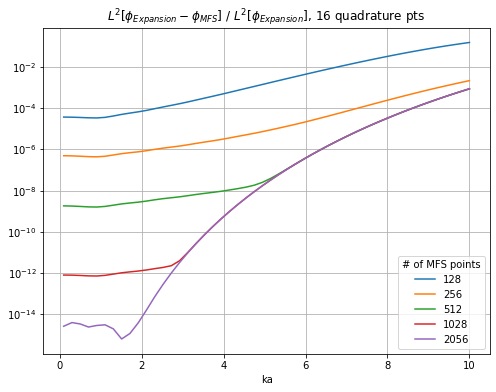

In [66]:
plt.figure(figsize  = (8,6))

plt.semilogy(ka, np.sqrt(L2_diff[0,:,0,4]/L2_hx[0]))
plt.semilogy(ka, np.sqrt(L2_diff[0,:,1,4]/L2_hx[0]))
plt.semilogy(ka, np.sqrt(L2_diff[0,:,2,4]/L2_hx[0]))
plt.semilogy(ka, np.sqrt(L2_diff[0,:,3,4]/L2_hx[0]))
plt.semilogy(ka, np.sqrt(L2_diff[0,:,4,4]/L2_hx[0]))
plt.title(r'$L^{2}[\phi_{Expansion} - \phi_{MFS}]\ /\ L^{2}[\phi_{Expansion}]$, 16 quadrature pts')
plt.legend(['128', '256', '512', '1028', '2056'], title = '# of MFS points')
plt.xlabel('ka');
plt.grid()
#plt.savefig(f'L2_Error_{NMFS}MFS_{N}quad#')

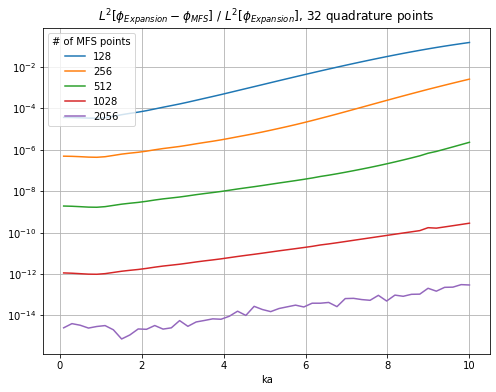

In [67]:
plt.figure(figsize  = (8,6))

plt.semilogy(ka, np.sqrt(L2_diff[1,:,0,4]/L2_hx[1]))
plt.semilogy(ka, np.sqrt(L2_diff[1,:,1,4]/L2_hx[1]))
plt.semilogy(ka, np.sqrt(L2_diff[1,:,2,4]/L2_hx[1]))
plt.semilogy(ka, np.sqrt(L2_diff[1,:,3,4]/L2_hx[1]))
plt.semilogy(ka, np.sqrt(L2_diff[1,:,4,4]/L2_hx[1]))
plt.title(r'$L^{2}[\phi_{Expansion} - \phi_{MFS}]\ /\ L^{2}[\phi_{Expansion}]$, 32 quadrature points')
plt.legend(['128', '256', '512', '1028', '2056'], title = '# of MFS points')
plt.xlabel('ka');
plt.grid()
#plt.savefig(f'L2_Error_{NMFS}MFS_{N}quad#')

In [1]:
ika = 25
plt.contourf(al, NMFS, np.log10(np.sqrt(L2_diff[0,ika,:,:])))
plt.colorbar()
plt.title(f'L2 Error')
plt.xlabel('scattering point depth')
plt.ylabel('# scattering points');

NameError: name 'plt' is not defined